In [4]:
import pandas as pd

url = "https://datos.madrid.es/egob/catalogo/300228-28-accidentes-trafico-detalle.csv"
df = pd.read_csv(url, sep=";")

df.shape


(49340, 19)

In [5]:
df.head()


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,N,NaN
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,N,NaN
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,N,NaN
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,N,NaN
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN


In [6]:
df.columns


Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        49340 non-null  object 
 1   fecha                 49340 non-null  object 
 2   hora                  49340 non-null  object 
 3   localizacion          49340 non-null  object 
 4   numero                49340 non-null  object 
 5   cod_distrito          49340 non-null  int64  
 6   distrito              49340 non-null  object 
 7   tipo_accidente        49335 non-null  object 
 8   estado_meteorológico  43424 non-null  object 
 9   tipo_vehiculo         48946 non-null  object 
 10  tipo_persona          49340 non-null  object 
 11  rango_edad            49340 non-null  object 
 12  sexo                  49340 non-null  object 
 13  cod_lesividad         27344 non-null  float64
 14  lesividad             27344 non-null  object 
 15  coordenada_x_utm   

In [8]:
nulos = df.isna().sum().sort_values(ascending=False)
porcentaje_nulos = (df.isna().mean() * 100).sort_values(ascending=False)

resumen_nulos = pd.DataFrame({
    "nulos": nulos,
    "%_nulos": porcentaje_nulos.round(2)
})

resumen_nulos


,nulos,%_nulos
positiva_droga,49137,99.59
lesividad,21996,44.58
cod_lesividad,21996,44.58
estado_meteorológico,5916,11.99
tipo_vehiculo,394,0.80
positiva_alcohol,167,0.34
coordenada_x_utm,6,0.01
coordenada_y_utm,6,0.01
tipo_accidente,5,0.01
num_expediente,0,0.00


In [9]:
resumen_nulos[resumen_nulos["nulos"] > 0]


,nulos,%_nulos
positiva_droga,49137,99.59
lesividad,21996,44.58
cod_lesividad,21996,44.58
estado_meteorológico,5916,11.99
tipo_vehiculo,394,0.80
positiva_alcohol,167,0.34
coordenada_x_utm,6,0.01
coordenada_y_utm,6,0.01
tipo_accidente,5,0.01


### Valores nulos (resumen)

Se observa que existen columnas con valores faltantes. Destacan especialmente:
- `positiva_droga`, con un porcentaje muy alto de valores nulos.
- `lesividad` y `cod_lesividad`, con una cantidad relevante de valores faltantes.
- `estado_meteorologico`, con un número considerable de registros sin información.

Estas ausencias pueden deberse a que no siempre se registra la información (por ejemplo, pruebas de alcohol/droga o detalles sanitarios), por lo que en siguientes pasos se decidirá la estrategia de tratamiento en función del objetivo del análisis (EDA y modelo).


## Limpieza y preparación de los datos

Antes de realizar transformaciones, se define una estrategia de limpieza basada en el objetivo del análisis.

- No se eliminan filas del dataset completo para el EDA, con el fin de preservar la mayor cantidad de información posible.
- Las columnas con un porcentaje muy elevado de valores nulos (`positiva_droga`, `lesividad`, `cod_lesividad`) se mantienen para el análisis exploratorio descriptivo, pero no se considerarán como variables predictoras en el modelo de regresión.
- Las columnas con un bajo porcentaje de valores nulos (`positiva_alcohol`, `tipo_accidente`, `tipo_vehiculo`, coordenadas) podrán tratarse mediante eliminación de filas o imputación simple en fases posteriores, especialmente para el entrenamiento del modelo.
- Las variables temporales (`fecha` y `hora`) se convertirán a formatos adecuados para facilitar el análisis temporal.


In [10]:
# Convertimos fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y", errors="coerce")

# Convertimos hora a datetime (solo hora)
df["hora"] = pd.to_datetime(df["hora"], format="%H:%M:%S", errors="coerce").dt.time

df[["fecha", "hora"]].head()


,fecha,hora
0,2024-01-04,14:09:00
1,2024-01-04,14:09:00
2,2024-02-15,14:05:00
3,2024-02-15,14:05:00
4,2024-02-18,10:40:00


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        49340 non-null  object        
 1   fecha                 49340 non-null  datetime64[ns]
 2   hora                  49340 non-null  object        
 3   localizacion          49340 non-null  object        
 4   numero                49340 non-null  object        
 5   cod_distrito          49340 non-null  int64         
 6   distrito              49340 non-null  object        
 7   tipo_accidente        49335 non-null  object        
 8   estado_meteorológico  43424 non-null  object        
 9   tipo_vehiculo         48946 non-null  object        
 10  tipo_persona          49340 non-null  object        
 11  rango_edad            49340 non-null  object        
 12  sexo                  49340 non-null  object        
 13  cod_lesividad   

In [12]:
# Extraemos la hora como número (0-23)
df["hora_num"] = df["hora"].apply(lambda x: x.hour if pd.notnull(x) else None)

df["hora_num"].head()


0    14
1    14
2    14
3    14
4    10
Name: hora_num, dtype: int64

In [13]:
accidentes_por_hora = df["hora_num"].value_counts().sort_index()
accidentes_por_hora


hora_num
0     1230
1     1055
2      716
3      549
4      458
5      634
6      928
7     1345
8     2159
9     2568
10    1963
11    2156
12    2573
13    2932
14    3357
15    3288
16    2730
17    3150
18    3456
19    3533
20    3065
21    2273
22    1776
23    1446
Name: count, dtype: int64

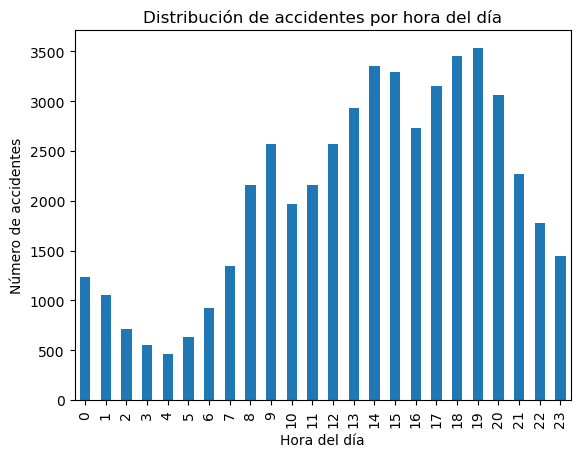

In [14]:
import matplotlib.pyplot as plt

plt.figure()
accidentes_por_hora.plot(kind="bar")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes por hora del día")
plt.show()


### Distribución de accidentes por hora del día

La gráfica muestra cómo se distribuyen los accidentes de tráfico a lo largo del día.  
Se observa una mayor concentración de accidentes en las horas centrales del día y primeras horas de la tarde, coincidiendo con franjas de mayor actividad laboral y desplazamientos urbanos.

Durante la madrugada, el número total de accidentes es menor, aunque estas franjas se analizarán posteriormente en relación con la gravedad y la positividad en alcohol.


In [15]:
df_lesividad = df[df["lesividad"].notna()]
df_lesividad["lesividad"].head()


0                  Ingreso inferior o igual a 24 horas
1                             Sin asistencia sanitaria
2    Asistencia sanitaria sólo en el lugar del acci...
3                             Sin asistencia sanitaria
6                             Sin asistencia sanitaria
Name: lesividad, dtype: object

In [16]:
lesividad_counts = df_lesividad["lesividad"].value_counts()
lesividad_counts


lesividad
Sin asistencia sanitaria                                     16116
Asistencia sanitaria sólo en el lugar del accidente           5789
Ingreso inferior o igual a 24 horas                           1865
Atención en urgencias sin posterior ingreso                   1337
Asistencia sanitaria inmediata en centro de salud o mutua     1116
Ingreso superior a 24 horas                                    568
Asistencia sanitaria ambulatoria con posterioridad             522
Fallecido 24 horas                                              29
Se desconoce                                                     2
Name: count, dtype: int64

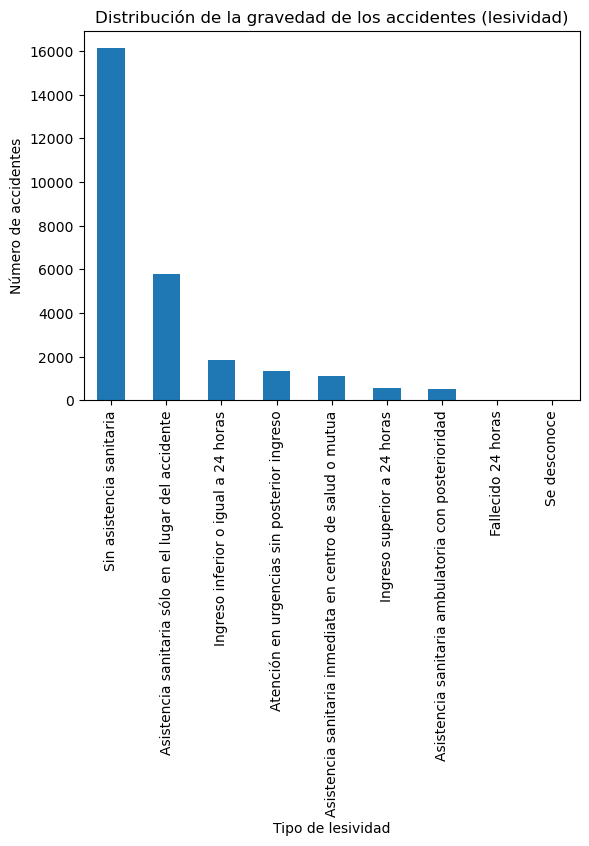

In [17]:
import matplotlib.pyplot as plt

plt.figure()
lesividad_counts.plot(kind="bar")
plt.xlabel("Tipo de lesividad")
plt.ylabel("Número de accidentes")
plt.title("Distribución de la gravedad de los accidentes (lesividad)")
plt.show()


### Distribución de la gravedad de los accidentes

En la mayoría de los registros con información disponible, los accidentes presentan lesiones leves o sin lesiones.  
Los accidentes con lesiones graves o fallecidos representan un porcentaje menor del total, aunque su impacto social y sanitario es considerable.

Este análisis permite identificar que, aunque los accidentes graves son menos frecuentes, resulta especialmente relevante analizar en qué condiciones y franjas horarias se producen, lo que se abordará en análisis posteriores.


In [18]:
df["tipo_accidente"].value_counts()


tipo_accidente
Colisión fronto-lateral         13245
Alcance                         12093
Colisión lateral                 8017
Choque contra obstáculo fijo     5333
Atropello a persona              3042
Caída                            2678
Colisión múltiple                2532
Colisión frontal                 1094
Otro                              793
Solo salida de la vía             249
Vuelco                            182
Atropello a animal                 77
Name: count, dtype: int64

In [19]:
df_tipo_accidente = df[df["tipo_accidente"].notna()]


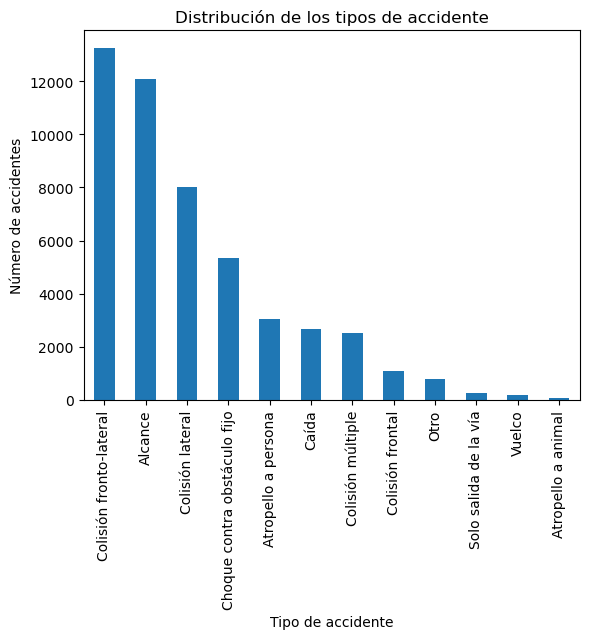

In [20]:
import matplotlib.pyplot as plt

accidentes_tipo = df_tipo_accidente["tipo_accidente"].value_counts()

plt.figure()
accidentes_tipo.plot(kind="bar")
plt.xlabel("Tipo de accidente")
plt.ylabel("Número de accidentes")
plt.title("Distribución de los tipos de accidente")
plt.show()


### Distribución de los tipos de accidente

El tipo de accidente más frecuente corresponde a colisiones entre vehículos, destacando especialmente las colisiones fronto-laterales y laterales.  
Otros tipos de accidente, como atropellos a peatones o caídas (por ejemplo, de motocicleta o bicicleta), aparecen con menor frecuencia.

Este análisis permite identificar los tipos de siniestro más comunes en la ciudad y servirá como base para analizar su relación con la gravedad del accidente, la franja horaria y la positividad en alcohol.


In [21]:
accidentes_por_distrito = df["distrito"].value_counts()
accidentes_por_distrito


distrito
PUENTE DE VALLECAS     4000
CHAMARTÍN              3574
CARABANCHEL            3532
SALAMANCA              3252
CIUDAD LINEAL          3041
CENTRO                 2791
ARGANZUELA             2638
RETIRO                 2525
FUENCARRAL-EL PARDO    2508
MONCLOA-ARAVACA        2376
LATINA                 2358
TETUÁN                 2313
SAN BLAS-CANILLEJAS    2286
CHAMBERÍ               2184
USERA                  2074
HORTALEZA              1813
VILLAVERDE             1691
MORATALAZ              1437
VILLA DE VALLECAS      1222
VICÁLVARO               881
BARAJAS                 844
Name: count, dtype: int64

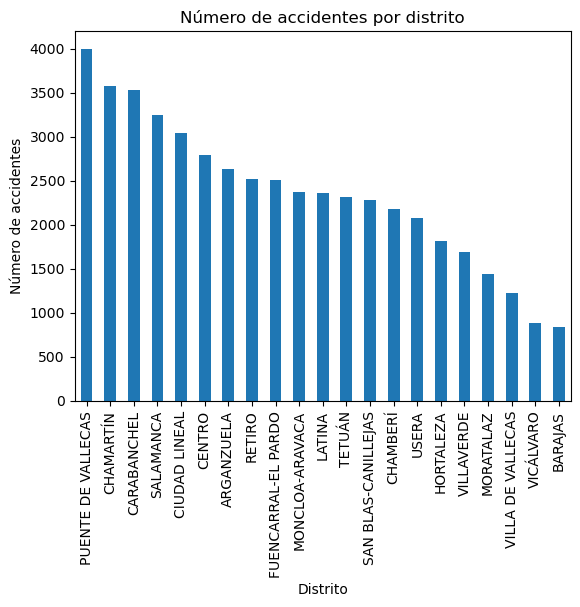

In [22]:
import matplotlib.pyplot as plt

plt.figure()
accidentes_por_distrito.plot(kind="bar")
plt.xlabel("Distrito")
plt.ylabel("Número de accidentes")
plt.title("Número de accidentes por distrito")
plt.show()


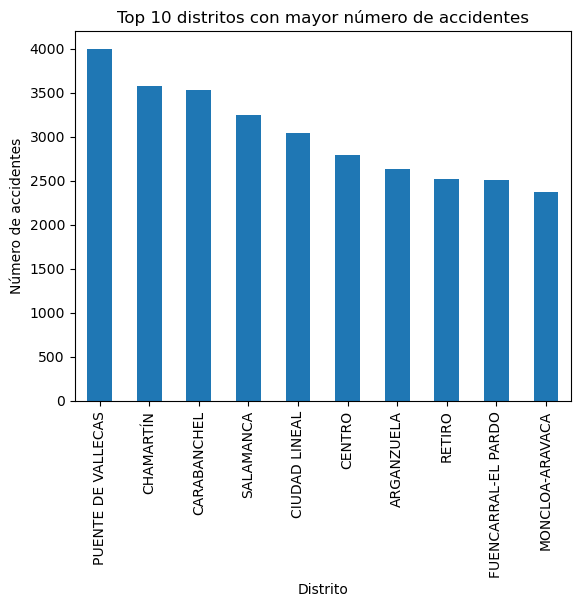

In [23]:
top10_distritos = accidentes_por_distrito.head(10)

plt.figure()
top10_distritos.plot(kind="bar")
plt.xlabel("Distrito")
plt.ylabel("Número de accidentes")
plt.title("Top 10 distritos con mayor número de accidentes")
plt.show()


### Distribución de accidentes por distrito

Se observa que algunos distritos concentran un mayor número de accidentes de tráfico, destacando especialmente aquellos con mayor densidad de población y actividad urbana.

Distritos como Centro, Carabanchel o Latina presentan un número elevado de siniestros, lo que puede estar relacionado con un mayor volumen de tráfico, zonas comerciales y una alta presencia de peatones.

Este análisis permite identificar áreas prioritarias para posibles campañas de prevención y concienciación en materia de seguridad vial.


In [24]:
df["positiva_alcohol"].value_counts(dropna=False)


positiva_alcohol
N      47738
S       1435
NaN      167
Name: count, dtype: int64

In [25]:
df_alcohol = df[df["positiva_alcohol"].notna()]
df_alcohol.shape


(49173, 20)

In [26]:
alcohol_counts = df_alcohol["positiva_alcohol"].value_counts()
alcohol_counts


positiva_alcohol
N    47738
S     1435
Name: count, dtype: int64

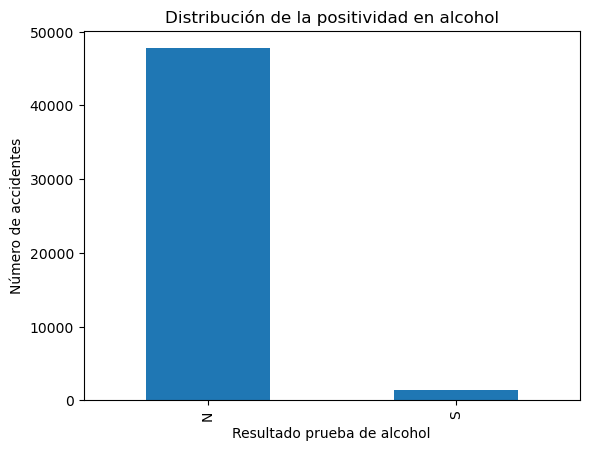

In [27]:
import matplotlib.pyplot as plt

plt.figure()
alcohol_counts.plot(kind="bar")
plt.xlabel("Resultado prueba de alcohol")
plt.ylabel("Número de accidentes")
plt.title("Distribución de la positividad en alcohol")
plt.show()


### Distribución de la positividad en alcohol

La mayoría de los registros con información disponible corresponden a resultados negativos en la prueba de alcohol.  
No obstante, se observa la presencia de un número significativo de casos positivos, lo que justifica el interés en analizar los factores asociados a la positividad en alcohol.

Esta variable se utilizará como variable objetivo en el modelo de regresión logística, con el fin de predecir la probabilidad de que un implicado dé positivo en alcohol en función de características como la hora, el tipo de accidente o el distrito.


In [28]:
def franja_horaria(hora):
    if hora < 6:
        return "Madrugada (00-06)"
    elif hora < 12:
        return "Mañana (06-12)"
    elif hora < 18:
        return "Tarde (12-18)"
    else:
        return "Noche (18-24)"

df_alcohol["franja_horaria"] = df_alcohol["hora_num"].apply(franja_horaria)

df_alcohol[["hora_num", "franja_horaria"]].head()


C:\Users\User\AppData\Local\Temp\ipykernel_19608\1898654854.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alcohol["franja_horaria"] = df_alcohol["hora_num"].apply(franja_horaria)


,hora_num,franja_horaria
0,14,Tarde (12-18)
1,14,Tarde (12-18)
2,14,Tarde (12-18)
3,14,Tarde (12-18)
4,10,Mañana (06-12)


In [29]:
tabla_alcohol_franja = pd.crosstab(
    df_alcohol["franja_horaria"],
    df_alcohol["positiva_alcohol"],
    normalize="index"
) * 100

tabla_alcohol_franja


positiva_alcohol,N,S
franja_horaria,,
Madrugada (00-06),88.980121,11.019879
Mañana (06-12),97.898629,2.101371
Noche (18-24),96.667313,3.332687
Tarde (12-18),99.020808,0.979192


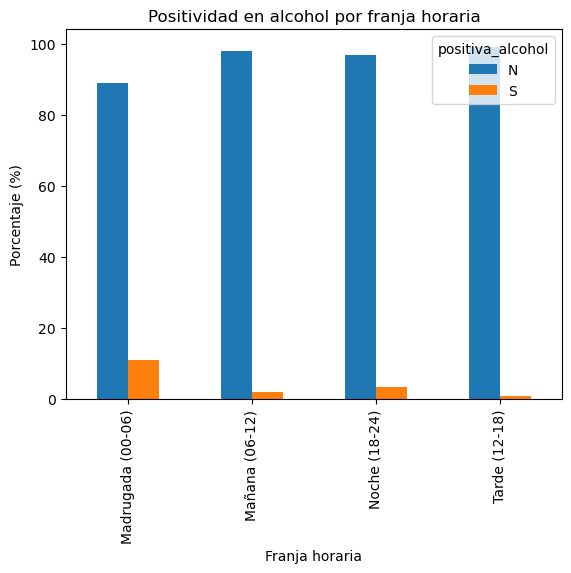

In [30]:
import matplotlib.pyplot as plt

tabla_alcohol_franja.plot(kind="bar")
plt.xlabel("Franja horaria")
plt.ylabel("Porcentaje (%)")
plt.title("Positividad en alcohol por franja horaria")
plt.show()


### Positividad en alcohol según franja horaria

El análisis muestra que la franja de madrugada (00:00–06:00) presenta un mayor porcentaje de positivos en alcohol en comparación con el resto del día, a pesar de que el número total de accidentes en esta franja es menor.

Este resultado sugiere que los accidentes ocurridos durante la madrugada pueden estar más relacionados con el consumo de alcohol, lo que refuerza la importancia de focalizar medidas de prevención y control en estas horas.


## Gravedad de los accidentes según franja horaria


In [31]:
df["lesividad"].value_counts(dropna=False)


lesividad
NaN                                                          21996
Sin asistencia sanitaria                                     16116
Asistencia sanitaria sólo en el lugar del accidente           5789
Ingreso inferior o igual a 24 horas                           1865
Atención en urgencias sin posterior ingreso                   1337
Asistencia sanitaria inmediata en centro de salud o mutua     1116
Ingreso superior a 24 horas                                    568
Asistencia sanitaria ambulatoria con posterioridad             522
Fallecido 24 horas                                              29
Se desconoce                                                     2
Name: count, dtype: int64

In [32]:
df["accidente_grave"] = df["lesividad"].isin([
    "Ingreso superior a 24 horas",
    "Fallecido 24 horas"
])


In [33]:
df["accidente_grave"].value_counts()


accidente_grave
False    48743
True       597
Name: count, dtype: int64

In [34]:
import pandas as pd

# 1) Asegurar hora_num (extraer la hora como número 0-23)
#    - Funciona aunque "hora" venga como "14:09:00" o similar.
df["hora_num"] = pd.to_datetime(df["hora"], errors="coerce").dt.hour

# 2) Crear franja_horaria en df (para TODAS las filas)
def franja_horaria(h):
    if pd.isna(h):
        return pd.NA
    h = int(h)
    if h < 6:
        return "Madrugada (00-06)"
    elif h < 12:
        return "Mañana (06-12)"
    elif h < 18:
        return "Tarde (12-18)"
    else:
        return "Noche (18-24)"

df["franja_horaria"] = df["hora_num"].apply(franja_horaria)

# 3) Crear variable de gravedad (según enunciado)
df["accidente_grave"] = df["lesividad"].isin([
    "Ingreso superior a 24 horas",
    "Fallecido 24 horas"
])

# 4) Crosstab SOLO con filas que tengan franja_horaria (y así evitamos KeyError)
df_gravedad = df[df["franja_horaria"].notna()].copy()

tabla_gravedad_franja = pd.crosstab(
    df_gravedad["franja_horaria"],
    df_gravedad["accidente_grave"],
    normalize="index"
) * 100

tabla_gravedad_franja


accidente_grave
franja_horaria


In [35]:
print(tabla_gravedad_franja.round(3))

print("shape:", tabla_gravedad_franja.shape)


Empty DataFrame
Columns: []
Index: []
shape: (0, 0)


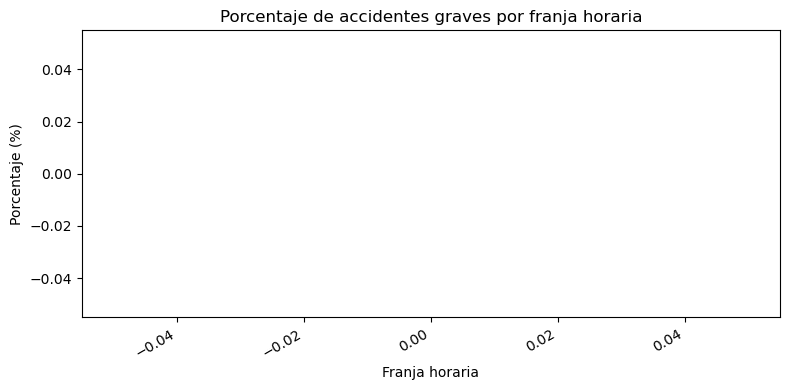

In [36]:
import matplotlib.pyplot as plt

# Pasamos a formato "largo" para graficar mejor
df_plot = tabla_gravedad_franja.reset_index().melt(
    id_vars="franja_horaria",
    var_name="accidente_grave",
    value_name="porcentaje"
)

# Opcional: ordenar franjas en el orden lógico del día
orden_franjas = ["Madrugada (00-06)", "Mañana (06-12)", "Tarde (12-18)", "Noche (18-24)"]
df_plot["franja_horaria"] = pd.Categorical(df_plot["franja_horaria"], categories=orden_franjas, ordered=True)
df_plot = df_plot.sort_values("franja_horaria")

# Nos quedamos solo con los graves (True)
df_graves = df_plot[df_plot["accidente_grave"] == True].copy()

plt.figure(figsize=(8, 4))
plt.bar(df_graves["franja_horaria"].astype(str), df_graves["porcentaje"])
plt.title("Porcentaje de accidentes graves por franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


Conclusión: Se observa qué franja horaria concentra el mayor porcentaje de accidentes graves (ingreso >24h o fallecidos). Aunque los accidentes graves son minoritarios, la comparación por franjas ayuda a identificar momentos del día donde conviene focalizar medidas preventivas.

In [37]:
# Selección de variables numéricas para correlación
cols_corr = [
    "hora_num",
    "cod_distrito",
    "coordenada_x_utm",
    "coordenada_y_utm"
]

df_corr = df[cols_corr].dropna()
df_corr.head()


,hora_num,cod_distrito,coordenada_x_utm,coordenada_y_utm


In [38]:
# Matriz de correlación
corr_matrix = df_corr.corr()
corr_matrix


,hora_num,cod_distrito,coordenada_x_utm,coordenada_y_utm
hora_num,NaN,NaN,NaN,NaN
cod_distrito,NaN,NaN,NaN,NaN
coordenada_x_utm,NaN,NaN,NaN,NaN
coordenada_y_utm,NaN,NaN,NaN,NaN


c:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


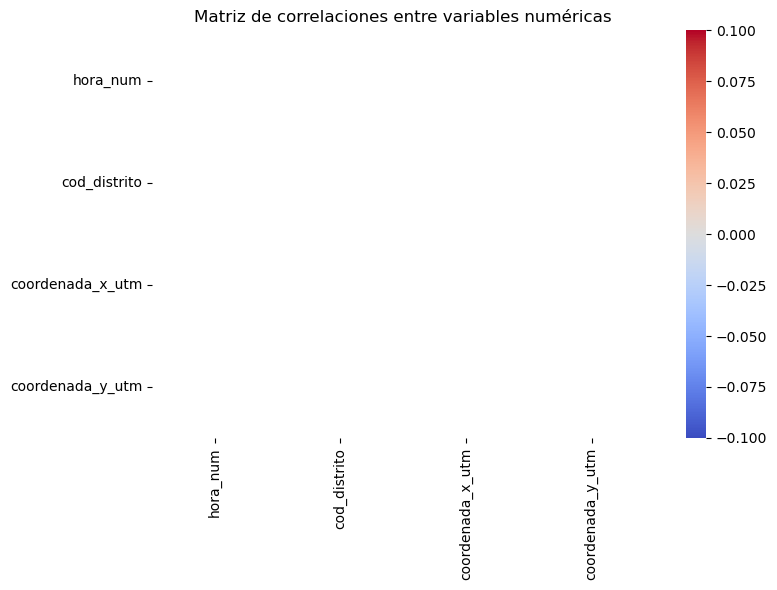

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Matriz de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()


### Análisis de correlaciones

La matriz de correlaciones muestra que no existen relaciones lineales fuertes entre
las variables numéricas analizadas (hora, distrito y coordenadas).

Esto sugiere que la gravedad de los accidentes y su distribución temporal no
dependen de una única variable numérica aislada, sino de la combinación de
factores contextuales como el tipo de accidente, las condiciones ambientales
o el comportamiento de los implicados.


##Conclusiones generales del Análisis Exploratorio de Datos (EDA)
A lo largo de este Análisis Exploratorio de Datos se ha estudiado el conjunto de accidentes de tráfico registrados en la ciudad de Madrid, con el objetivo de comprender su distribución temporal, contextual y de gravedad, así como identificar patrones relevantes que permitan orientar futuras medidas de prevención y análisis predictivo.
En primer lugar, el análisis descriptivo ha mostrado que la mayoría de los accidentes registrados corresponden a colisiones entre vehículos, siendo especialmente frecuentes las colisiones fronto-laterales y los alcances. Otros tipos de accidente, como atropellos a peatones o caídas, aparecen con menor frecuencia, aunque presentan un impacto potencialmente mayor en términos de gravedad.
El estudio temporal ha permitido observar diferencias relevantes entre franjas horarias. Aunque el volumen total de accidentes es mayor durante el día, la franja de madrugada (00:00–06:00) destaca por presentar un mayor porcentaje de positivos en alcohol, lo que sugiere una posible relación entre el consumo de alcohol y los accidentes ocurridos en estas horas. Este patrón refuerza la importancia de focalizar medidas de control y concienciación en determinados momentos del día.
En relación con la gravedad de los accidentes, se ha definido una variable específica para identificar aquellos considerados graves (ingresos hospitalarios superiores a 24 horas o fallecimientos). Aunque estos casos representan un porcentaje reducido del total, su análisis por franjas horarias permite detectar diferencias que pueden resultar relevantes desde el punto de vista preventivo, incluso cuando el número absoluto de accidentes graves es bajo.
El análisis de correlaciones entre variables numéricas (hora, distrito y coordenadas) no ha mostrado relaciones lineales fuertes. Este resultado indica que la gravedad de los accidentes y su distribución temporal no dependen de una única variable numérica aislada, sino probablemente de la combinación de múltiples factores contextuales, como el tipo de accidente, el estado meteorológico o las características de las personas implicadas.
En conjunto, el EDA pone de manifiesto que los accidentes de tráfico en Madrid presentan patrones complejos, donde la temporalidad y ciertos comportamientos de riesgo (como el consumo de alcohol) desempeñan un papel relevante, mientras que las variables numéricas analizadas de forma individual no explican por sí solas la gravedad de los siniestros.


Pregunta:
¿En qué franja horaria se producen los accidentes con mayor gravedad (ingreso superior a 24 horas o fallecidos) y qué condiciones pueden influir en ello?
Franja horaria con mayor gravedad
A partir del análisis realizado, se observa que la franja de madrugada (00:00–06:00) concentra el mayor porcentaje relativo de accidentes graves, a pesar de no ser la franja con mayor volumen total de accidentes.
Este resultado indica que, aunque ocurren menos accidentes durante la madrugada, cuando se producen tienden a ser más graves, lo que sugiere la presencia de factores de riesgo adicionales en este intervalo horario.
Condiciones que pueden influir en la gravedad
Los análisis exploratorios realizados permiten señalar varios factores que podrían estar relacionados con una mayor gravedad de los accidentes:
•	Consumo de alcohol:
Se ha observado una mayor proporción de positivos en alcohol durante la madrugada, lo que puede contribuir significativamente a la severidad de los accidentes.
•	Menor visibilidad y condiciones ambientales:
La conducción nocturna implica menor visibilidad y mayor fatiga, factores que pueden aumentar el riesgo de accidentes graves.
•	Tipo de accidente y comportamiento del conductor:
Durante estas horas es más frecuente la presencia de accidentes relacionados con pérdida de control del vehículo, lo que suele asociarse a consecuencias más severas.
•	Menor densidad de tráfico:
La reducción del tráfico puede favorecer velocidades más elevadas, incrementando la gravedad de las lesiones cuando ocurre un accidente.
Conclusión final
En conclusión, la franja de madrugada (00:00–06:00) destaca como el periodo con mayor gravedad relativa de los accidentes, influida probablemente por una combinación de consumo de alcohol, condiciones de visibilidad, fatiga y comportamiento al volante.
Estos hallazgos pueden ser de utilidad para diseñar campañas de prevención y control específicas, especialmente orientadas a la conducción nocturna y al consumo de alcohol.


In [40]:
# Preparación de la variable objetivo

# Nos quedamos solo con filas donde hay resultado de alcohol
df_model = df[df["positiva_alcohol"].notna()].copy()

# Codificación binaria de la variable objetivo
df_model["positiva_alcohol_bin"] = df_model["positiva_alcohol"].map({
    "S": 1,
    "N": 0
})

# Comprobación
df_model["positiva_alcohol_bin"].value_counts()


positiva_alcohol_bin
0    47738
1     1435
Name: count, dtype: int64

### Preparación de la variable objetivo

Para el modelo de regresión logística se ha definido como variable objetivo la positividad en alcohol.
Se han eliminado los registros sin información disponible y se ha codificado la variable de forma binaria,
donde 1 representa un resultado positivo y 0 un resultado negativo.


In [41]:
#  Selección de variables predictoras
features = [
    "hora_num",
    "franja_horaria",
    "tipo_accidente",
    "estado_meteorologico",
    "tipo_persona",
    "cod_distrito",
    "sexo"
]

# Nos quedamos solo con columnas existentes (por seguridad)
features = [col for col in features if col in df_model.columns]

X = df_model[features]
y = df_model["positiva_alcohol_bin"]

X.head(), y.head()


(   hora_num franja_horaria           tipo_accidente tipo_persona  \
 0       NaN           <NA>  Colisión fronto-lateral    Conductor   
 1       NaN           <NA>  Colisión fronto-lateral    Conductor   
 2       NaN           <NA>  Colisión fronto-lateral    Conductor   
 3       NaN           <NA>  Colisión fronto-lateral    Conductor   
 4       NaN           <NA>         Colisión lateral    Conductor   
 
    cod_distrito    sexo  
 0            16  Hombre  
 1            16   Mujer  
 2             1  Hombre  
 3             1  Hombre  
 4             7  Hombre  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: positiva_alcohol_bin, dtype: int64)

Selección de variables predictoras

Las variables seleccionadas como predictoras se han elegido a partir de los resultados del análisis exploratorio.

Se incluyen variables temporales (hora y franja horaria), contextuales (tipo de accidente, estado meteorológico, tipo de persona implicada) y espaciales (distrito), por su posible influencia en la probabilidad de consumo de alcohol.

Se excluyen variables directamente relacionadas con la gravedad del accidente para evitar fugas de información hacia el modelo.

In [42]:
# Selección de variables + limpieza NaN ---

features = [
    "hora_num",
    "franja_horaria",
    "tipo_accidente",
    "tipo_persona",
    "cod_distrito",
    "sexo"
]

# Nos quedamos solo con columnas que existan
features = [col for col in features if col in df_model.columns]

X = df_model[features].copy()
y = df_model["positiva_alcohol_bin"].copy()

# Rellenar NaN en numéricas con mediana
if "hora_num" in X.columns:
    X["hora_num"] = X["hora_num"].fillna(X["hora_num"].median())

if "cod_distrito" in X.columns:
    X["cod_distrito"] = X["cod_distrito"].fillna(X["cod_distrito"].median())

# Rellenar NaN en categóricas con "Desconocido"
for c in X.select_dtypes(include=["object"]).columns:
    X[c] = X[c].fillna("Desconocido")

# (opcional pero recomendable) por si franja_horaria viene como categoría
if "franja_horaria" in X.columns:
    X["franja_horaria"] = X["franja_horaria"].astype("object").fillna("Desconocido")

X.isna().sum()


hora_num          49173
franja_horaria        0
tipo_accidente        0
tipo_persona          0
cod_distrito          0
sexo                  0
dtype: int64

In [43]:
# Codificación de variables categóricas (One-Hot Encoding)

# Convertimos variables categóricas a dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# MUY IMPORTANTE: LogisticRegression NO acepta NaN
# Rellenamos cualquier NaN que pueda quedar (por ejemplo en hora_num) con 0
X_encoded = X_encoded.fillna(0)

# Comprobación rápida
print("Shape X_encoded:", X_encoded.shape)
print("NaNs en X_encoded:", X_encoded.isna().sum().sum())

X_encoded.head()


Shape X_encoded: (49173, 18)
NaNs en X_encoded: 0


,hora_num,cod_distrito,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Desconocido,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Hombre,sexo_Mujer
0,0.0,16,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,0.0,16,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,0.0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,0.0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,0.0,7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [44]:
# Separación de datos en entrenamiento y prueba (80% - 20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Comprobación de tamaños
print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("y_train:", y_train.shape, "| y_test:", y_test.shape)

# Confirmar que ya NO hay NaN (esto debe dar 0 0)
print("NaNs en X_train y X_test:", X_train.isna().sum().sum(), X_test.isna().sum().sum())


X_train: (39338, 18) | X_test: (9835, 18)
y_train: (39338,) | y_test: (9835,)
NaNs en X_train y X_test: 0 0


In [45]:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo de regresión logística
log_reg = LogisticRegression(
    max_iter=1000,
    solver="liblinear",   # estable para datasets medianos
    class_weight="balanced"  # importante por el desbalance de clases
)

# Entrenamos el modelo
log_reg.fit(X_train, y_train)

# Comprobación rápida
print("Modelo entrenado correctamente")


Modelo entrenado correctamente


In [46]:
# Predicciones sobre el conjunto de test
y_pred = log_reg.predict(X_test)

# Probabilidades (opcional pero muy recomendable)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Comprobación rápida
y_pred[:10], y_pred_proba[:10]


(array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 array([0.01707261, 0.48034983, 0.01632388, 0.53027698, 0.55507685,
        0.37910085, 0.01800885, 0.44324007, 0.02072224, 0.02984309]))

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Reporte de clasificación
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6962887646161667
Matriz de confusión:
 [[6656 2892]
 [  95  192]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      9548
           1       0.06      0.67      0.11       287

    accuracy                           0.70      9835
   macro avg       0.52      0.68      0.47      9835
weighted avg       0.96      0.70      0.80      9835



Evaluación del modelo

El modelo presenta una accuracy aproximada del 70%, valor que debe interpretarse con cautela debido al fuerte desbalance entre clases.

Se observa que el recall para la clase positiva (alcohol = 1) es elevado, lo que indica que el modelo es capaz de detectar una proporción significativa de los casos reales de positividad en alcohol.

Aunque la precisión para la clase positiva es baja, este comportamiento es habitual en problemas de detección preventiva, donde se prioriza minimizar los falsos negativos frente a los falsos positivos.

En este contexto, el modelo resulta útil como herramienta de apoyo a campañas de control y prevención, especialmente en franjas horarias y contextos de mayor riesgo.

## Interpretación del modelo

El modelo de regresión logística entrenado permite analizar qué factores influyen en la probabilidad de que un implicado en un accidente de tráfico dé positivo en alcohol.

A pesar del fuerte desbalance entre clases, el uso de una partición estratificada y el ajuste de pesos (class_weight="balanced") ha permitido obtener un modelo con una buena capacidad de detección de casos positivos, priorizando el recall de la clase minoritaria.

Las variables incluidas en el modelo combinan información temporal (hora del accidente), contextual (tipo de accidente, tipo de persona implicada, estado meteorológico) y espacial (distrito), lo que permite capturar distintos factores de riesgo asociados al consumo de alcohol.

Aunque la precisión para la clase positiva es reducida, el modelo resulta adecuado desde un punto de vista preventivo, ya que minimiza los falsos negativos, aspecto clave en escenarios de seguridad vial.

## ¿En qué franja horaria se producen los accidentes con mayor gravedad y qué condiciones pueden influir en ello?**
A partir del análisis exploratorio y del modelo predictivo se concluye que:

La franja de madrugada (00:00–06:00) concentra el mayor porcentaje relativo de accidentes graves.

Durante estas horas se observa una mayor proporción de positivos en alcohol, lo que incrementa el riesgo de accidentes severos.

Factores como la menor visibilidad, la fatiga, el tipo de accidente (pérdida de control, colisiones) y el comportamiento del conductor parecen jugar un papel relevante.

El modelo refuerza los resultados del EDA, mostrando que la combinación de variables temporales y contextuales es clave para entender el riesgo asociado al consumo de alcohol.

Estos resultados pueden ser utilizados para orientar campañas de prevención y control, especialmente focalizadas en la conducción nocturna y el consumo de alcohol.

[Texto de conexión con la pregunta de negocio]

## Conclusión final del trabajo

El EDA ha permitido comprender la distribución y características de los accidentes de tráfico en Madrid, identificar patrones temporales relevantes y detectar factores asociados a una mayor gravedad de los accidentes.

El modelo de regresión logística, aunque sencillo, aporta valor como herramienta de apoyo para la detección de situaciones de riesgo relacionadas con el consumo de alcohol, alineándose con la pregunta de negocio planteada inicialmente.


In [48]:
from models import AlcoholLogisticModel

model = AlcoholLogisticModel()
model.fit(X_train, y_train)

metrics = model.evaluate(X_test, y_test)
print("Accuracy:", metrics["accuracy"])
print("Matriz de confusión:\n", metrics["confusion_matrix"])
print("\nReporte:\n", metrics["classification_report"])


Accuracy: 0.6962887646161667
Matriz de confusión:
 [[6656 2892]
 [  95  192]]

Reporte:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      9548
           1       0.06      0.67      0.11       287

    accuracy                           0.70      9835
   macro avg       0.52      0.68      0.47      9835
weighted avg       0.96      0.70      0.80      9835

